# Parkinson's Disease Classification

In [66]:
%pip install patool

Note: you may need to restart the kernel to use updated packages.


In [67]:
import pandas as pd
import ehrapy as ep
import ehrdata as ed
import numpy as np
import warnings
import patoolib
import os
warnings.filterwarnings("ignore")

In [68]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [69]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/00470/pd_speech_features.rar

Nothing to do - goodbye


In [70]:
base_directory = os.getcwd()
patoolib.extract_archive("pd_speech_features.rar", outdir=base_directory, interactive = False)

INFO patool: Extracting pd_speech_features.rar ...
INFO patool: running /usr/bin/unar -o /home/andreas/Helmholtz/ehrapy-datasets/parkinson's_disease_classification pd_speech_features.rar
INFO patool: ... pd_speech_features.rar extracted to `/home/andreas/Helmholtz/ehrapy-datasets/parkinson's_disease_classification'.


"/home/andreas/Helmholtz/ehrapy-datasets/parkinson's_disease_classification"

# Data Wrangling

In [71]:
data = pd.read_csv("pd_speech_features.csv", sep=",", header=1)

Since the dataset does not have a measurement ID we add one.

In [72]:
data["measurement_id"] = range(1, len(data) + 1)

In [73]:
data.set_index("measurement_id", inplace=True)

In [74]:
data.to_csv("parkinson's_disease_classification_prepared.csv")

## ehrapy sanity check

In [75]:
columns_obs_only=["id"]

In [76]:
adata = ep.io.read_csv("parkinson's_disease_classification_prepared.csv",
                   index_column="measurement_id",
                   columns_obs_only=columns_obs_only)
edata = ed.EHRData.from_adata(adata=adata)


In [77]:
edata=ep.pp.encode(edata,autodetect=True)

! Features 'gender', 'class' were detected as categorical features stored numerically.Please verify and correct using `ep.ad.replace_feature_types` if necessary.
! Feature types were inferred and stored in adata.var[feature_type]. Please verify using `ep.ad.feature_type_overview` and adjust if necessary using `ep.ad.replace_feature_types`.
! Detected no columns that need to be encoded. Leaving passed AnnData object unchanged.


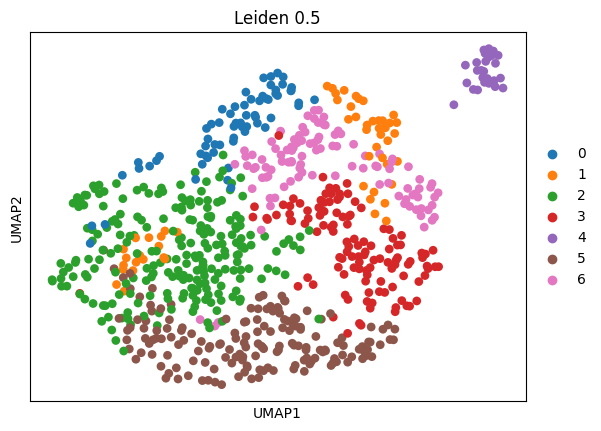

In [78]:
ep.pp.scale_norm(edata)
ep.pp.pca(edata)
ep.pp.neighbors(edata)
ep.tl.umap(edata)
ep.tl.leiden(edata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(edata, color=["leiden_0_5"], title="Leiden 0.5")